In [1]:
import numpy as np
from numpy.linalg import *
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
def distance(x):
    # dist is the square of distance
    M,D = x.shape
    dist = np.zeros((M,M))
    for i in range(M):
        dist[:,i] = ((x - x[i,:])**2).sum(1)
    return dist

In [3]:
def MDS(x,dim=0):
    M,D = x.shape
    if dim==0:
        dim = D
    dist = distance(x)
    dist_id = dist.mean(1)
    dist_dj = dist.mean(0)
    dist_dd = dist.sum()/(M**2)
    B = np.zeros_like(dist)
    B = (dist - dist_id) - dist_dj + dist_dd
    B = -0.5 * B
    U,S,V = svd(B)
    S = np.diag(S[:dim])
    U = U[:dim,:]
    V = V[:dim,:]
    ZU = np.dot(U.T,S)
    ZV = np.dot(V.T,S)
    return ZU,ZV

In [4]:
data_path = "E://yuwoliang/three set/SpectralClassification/No removal of continuous spectrum/"

data=sio.loadmat( data_path + "SpectralClassificationTrain.mat" ) 
train_x = data['train_x']
train_y = data['train_y'][:,0]

data=sio.loadmat( data_path + "SpectralClassificationTest.mat" ) 
test_x = data['test_x']
test_y = data['test_y'][:,0]

del data

In [5]:
ZU,ZV = MDS(train_x,2)

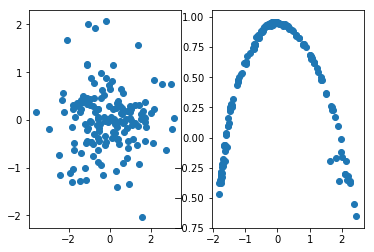

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.scatter( ZU[:,0].reshape(-1),ZU[:,1].reshape(-1) )
ax = fig.add_subplot(1,2,2)
ax.scatter( ZV[:,0].reshape(-1),ZV[:,1].reshape(-1) )
plt.show()